In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from datetime import datetime, date, time
from geopy.distance import great_circle

In [2]:
data = pd.read_csv('Data.csv', delimiter = ';',encoding='Windows-1251') 
data['Дата и время'] = pd.to_datetime(data['Дата и время'], format='%d.%m.%Y %H:%M')

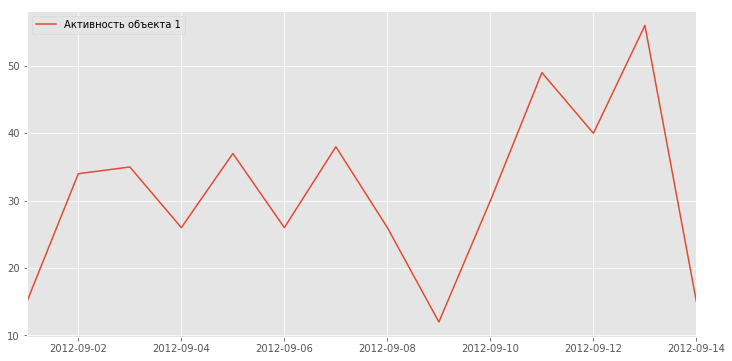

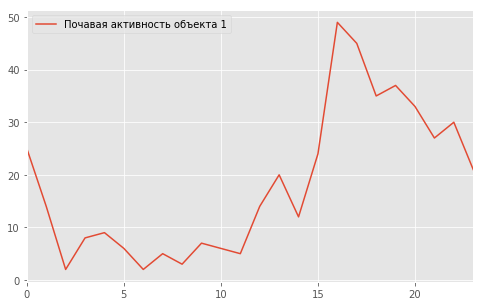

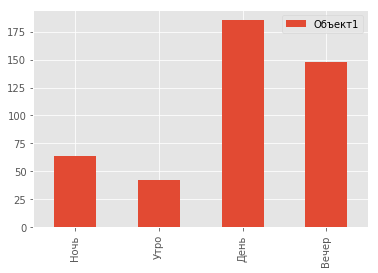

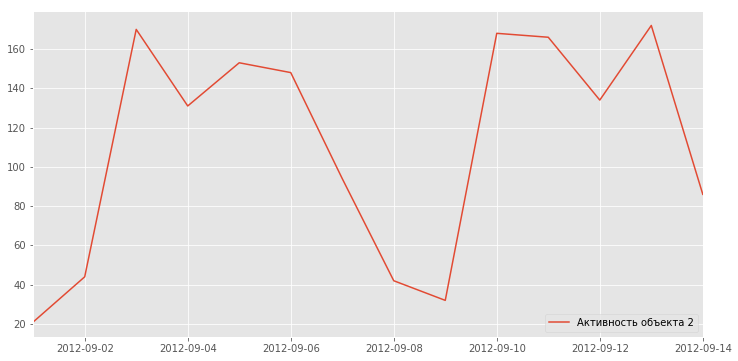

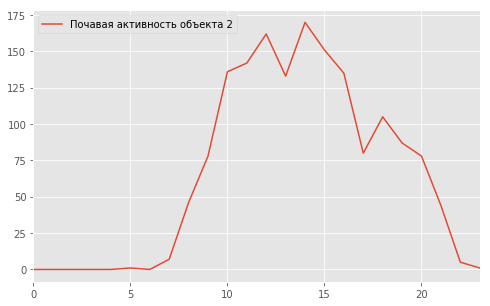

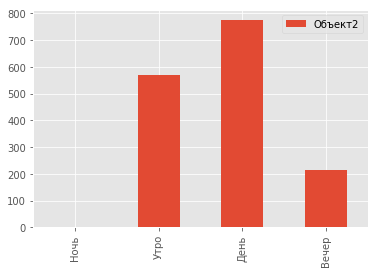

In [3]:
obj = data.groupby('Объект') #группировка по объектам
sample = [] # список данных, разбитых по объектам
#b = [] # массив дат
Night = [] # массив активностей объектов
Morning = []# массив активностей объектов
Day = []# массив активностей объектов
Evening = []# массив активностей объектов
maxdayactivity = [] # массив активностей объектов
for g in obj: 
    sample.append(g[1])
for k in range(len(sample)):
    c = []
    b = [] # массив дат
    a = list(sample[k]['Дата и время']) 
    #for i in range(len(a)):
    #    a[i] = datetime.strptime(a[i], '%d.%m.%Y %H:%M')
    for i in range(len(a)): # отсекли только даты, а - список дат
        b.append(a[i].date())
        c.append(a[i].hour)
    delta = b[-1] - b[0]
    delta = b[-1]-b[0] # количество дней наблюдения - 1
    period = pd.date_range(start=str(b[0]),periods=delta.days + 1) # период наблюдения
    hours = list(range(24))
    numdays = [] # массив количества выходов на связь по дням 
    ardays = []
    for i in range(delta.days + 1):
        ardays.append(period[i].date()) # дни
        numdays.append(b.count(period[i].date())) # количество выходов на связь в день
    nhour = []
    for i in range(24):
        nhour.append(c.count(i))    
    pl = pd.DataFrame(numdays, index=ardays ,columns= ['Активность объекта %d'%(k+1)])
    pl1 = pd.DataFrame(nhour, index=hours,columns= ['Почавая активность объекта %d'%(k+1)])
    N = sum(nhour[0:6]) #количество выходов на связь ночью
    M = sum(nhour[6:13]) #количество выходов на связь утром
    D = sum(nhour[13:19])#количество выходов на связь днем
    E = sum(nhour[19:24])#количество выходов на связь вечером
    maxdayactivity.append(numdays.index(max(numdays))+1)
    Night.append(N)
    Morning.append(M)
    Day.append(D)
    Evening.append(E)
    plHist = pd.DataFrame([N,M,D,E], index=['Ночь', 'Утро', 'День', 'Вечер'], columns= ['Объект%d'%(k+1)])
    pl.plot(figsize=(12,6))
    pl1.plot(figsize=(8,5))
    plHist.plot(kind='bar')
    plt.show()

In [4]:
for i in range(len(maxdayactivity)):
    print('Активность объекта %d максимальна в  %d-й день наблюдения'%((i+1), maxdayactivity[i]))
print('Объект %d самый активный ночью'%(Night.index(max(Night))+1))
print('Объект %d самый активный утром'%(Morning.index(max(Morning))+1))
print('Объект %d самый активный днем'%(Day.index(max(Day))+1))
print('Объект %d самый активный вечером'%(Evening.index(max(Evening))+1))

Активность объекта 1 максимальна в  13-й день наблюдения
Активность объекта 2 максимальна в  13-й день наблюдения
Объект 1 самый активный ночью
Объект 2 самый активный утром
Объект 2 самый активный днем
Объект 2 самый активный вечером


In [5]:
T = input("Введите временной интервал (минуты): ")
L = input("Введите простанственный интервал (метры): ")

Введите временной интервал (минуты): 20
Введите простанственный интервал (метры): 1000


In [6]:
for i in range(len(data) - 1):
    j = i + 1
    while j < len(data):
        k = great_circle((data['Широта'][i],data['Долгота'][i]), (data['Широта'][j], data['Долгота'][j])).meters
        time_i = data['Дата и время'][i]
        time_j = data['Дата и время'][j]
        if ((time_j < (time_i + pd.tseries.offsets.Minute(T))) and (k < int(L))) or (time_j < time_i + pd.tseries.offsets.Minute(T)):            
            if data['Объект'][i] != data['Объект'][j] and k < int(L):
                print('Расстояние(',data['Объект'][i], data['Объект'][j],') =', k)
                j = j +1
            else:
                j = j + 1
                continue
        else:
            break

Расстояние( Объект_2 Объект_1 ) = 2.5524194893761782
Расстояние( Объект_2 Объект_1 ) = 2.5524194893761782
Расстояние( Объект_2 Объект_1 ) = 2.5524194893761782
Расстояние( Объект_1 Объект_2 ) = 2.5524194890493725
Расстояние( Объект_1 Объект_2 ) = 2.5524194890493725
Расстояние( Объект_1 Объект_2 ) = 2.5524194890493725
Расстояние( Объект_1 Объект_2 ) = 574.1142377867585
Расстояние( Объект_1 Объект_2 ) = 2.5524194890493725
Расстояние( Объект_2 Объект_1 ) = 2.5524194893761782
Расстояние( Объект_1 Объект_2 ) = 2.5524194890493725
Расстояние( Объект_1 Объект_2 ) = 2.5524194890493725
Расстояние( Объект_1 Объект_2 ) = 574.1142377867585
Расстояние( Объект_1 Объект_2 ) = 2.5524194890493725
Расстояние( Объект_2 Объект_1 ) = 723.2680229269448
Расстояние( Объект_2 Объект_1 ) = 778.5031652664256
